0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.010000000000000009
32 0.020000000000000018
33 0.030000000000000027
34 0.040000000000000036
35 0.050000000000000044
36 0.06
37 0.07
38 0.08000000000000002
39 0.09000000000000002
40 0.10000000000000003
41 0.11000000000000004
42 0.12
43 0.13
44 0.14
45 0.15000000000000002
46 0.16000000000000003
47 0.17000000000000004
48 0.18
49 0.19
50 0.2
51 0.18999999999999995
52 0.17999999999999994
53 0.16999999999999993
54 0.15999999999999992
55 0.1499999999999999
56 0.1399999999999999
57 0.1299999999999999
58 0.12
59 0.10999999999999999
60 0.09999999999999998
61 0.08999999999999997
62 0.07999999999999996
63 0.06999999999999995
64 0.05999999999999994
65 0.04999999999999993
66 0.039999999999999925
67 0.029999999999999916
68 0.019999999999999907
69 0.009999999999999898
70 -1.1102230246251565e-16

<IPython.core.display.Javascript object>


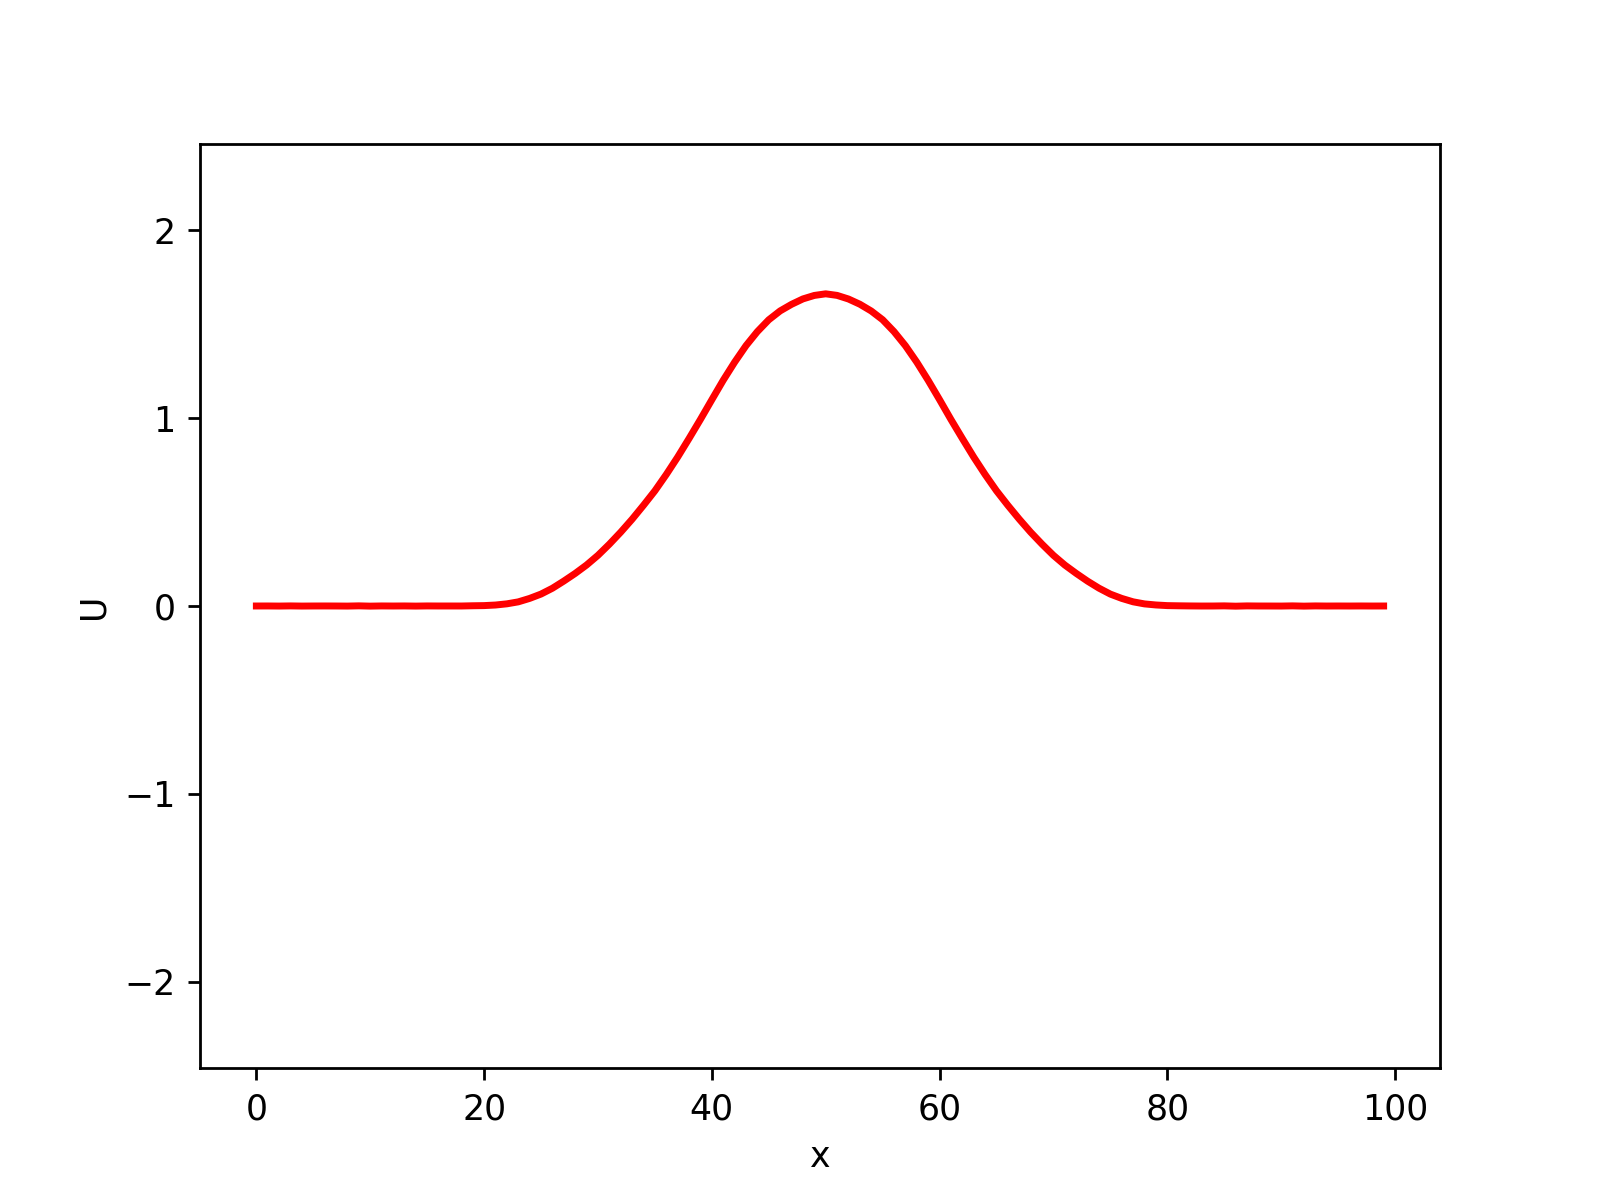

In [8]:
## 1D Wave Equation

from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import ArtistAnimation 


T=1 #tension[N]
rho=1 #density[Kg/m]
c = np.sqrt(T/rho) #Phase velocity

Lx = 1 #length[m]
t_max = 5

Nx = 100

delta_x = Lx/Nx

delta_t=0.9*delta_x/c   #Maximum time step that satisfies the stability condition
#print("delta_t=",delta_t)

Nt = int(t_max/delta_t)
st=c*delta_t/delta_x 

u =  np.zeros([Nx,Nt])

""" 
#Initial conditions
for i in range (Nx) :
#    if i <= 0.8*Nx :
#        u[i,0]=1.25*i/Nx
#    else :  
#        u[i,0] = 5.0*(1-i/Nx)
    if (i>.3*Nx) and (i<=.5*Nx):
        u[i,0]=(i*delta_x)-0.3
      #  u[i,0]=0.2
    elif (i>=0.5*Nx) and (i<0.7*Nx):
        u[i,0]=0.7-(i*delta_x)
     #   u[i,0]=  0.2
    else:
        u[i,0]=0
"""          
for i in range (Nx) :
    if (i>=.3*Nx) and (i<=.5*Nx):
        u[i,0]=-0.3+(i*delta_x )
    elif (i>=0.5*Nx) and (i<=0.7*Nx):
        u[i,0]=0.7-(i*delta_x )
    else:
        u[i,0]=0       
for i in range( Nx):       
    print(i,u[i,0])       
                
        
        


for i in range(1,Nx-1): # u[:,1]settings of
    u[i,1]  = u[i,0]+0.5*((delta_t/delta_x)**2)*(c**2)*(u[i+1,0]+u[i-1,0]-2*u[i,0])


for j in range(Nt-1):
    for i in range(1,Nx-1):
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+(st**2)* (u[i+1,j]+u[i-1,j]-2*u[i,j])
     #boundary condition
    u[0,:] = 0
    u[-1,:] = 0   

x=list(range(Nx))
y=list(range(Nt))

X, Y = np.meshgrid(x,y)

def functz(u):
    z=u[X,Y]
    return z

#Z = functz(u)
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.plot_wireframe(X,Y,Z, color='r')
#ax.set_xlabel('x')
#ax.set_ylabel('t')
#ax.set_zlabel('U')
#plt.show()

%matplotlib nbagg 
#from matplotlib.animation import ArtistAnimation #Import methods for creating animations

fig = plt.figure()

anim = [] #A list for storing the data of the para-para diagram drawn for animation

for i in range(0,Nt-1):
    U=list(u[:,i])
    x=list(range(Nx))
 #   if i % int(Nt*0.01) ==0: 
    im=plt.plot(x,U, '-', color='red',markersize=10, linewidth = 2, aa=True)
    anim.append(im)

anim = ArtistAnimation(fig, anim) #Animation creation
plt.xlabel('x')
plt.ylabel('U')

fig.show()

